In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [4]:
X_val, y_val = X_train[50000:], y_train[50000:]
X_train, y_train = X_train[:50000], y_train[:50000]

In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

c:\Users\vaibh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
checkpoint = ModelCheckpoint(filepath="best_model_sparse.h5",
                             monitor="val_loss",save_best_only=True,mode="min",verbose=1)

In [8]:
es = EarlyStopping(monitor="val_loss",
                   patience=5,restore_best_weights=True)

In [9]:
lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.5,patience=2,verbose=1)

In [10]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50,batch_size=64,verbose=1,callbacks=[checkpoint,es,lr_scheduler])

Epoch 1/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 1.1850
Epoch 1: val_loss improved from None to 0.43465, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8579 - loss: 0.8340 - val_accuracy: 0.9593 - val_loss: 0.4346 - learning_rate: 0.0010
Epoch 2/50
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9253 - loss: 0.5252
Epoch 2: val_loss improved from 0.43465 to 0.33509, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9289 - loss: 0.4972 - val_accuracy: 0.9668 - val_loss: 0.3351 - learning_rate: 0.0010
Epoch 3/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9388 - loss: 0.4208
Epoch 3: val_loss improved from 0.33509 to 0.30499, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9399 - loss: 0.4052 - val_accuracy: 0.9645 - val_loss: 0.3050 - learning_rate: 0.0010
Epoch 4/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9483 - loss: 0.3568
Epoch 4: val_loss improved from 0.30499 to 0.26977, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9447 - loss: 0.3628 - val_accuracy: 0.9705 - val_loss: 0.2698 - learning_rate: 0.0010
Epoch 5/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9484 - loss: 0.3381
Epoch 5: val_loss improved from 0.26977 to 0.26972, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9482 - loss: 0.3366 - val_accuracy: 0.9657 - val_loss: 0.2697 - learning_rate: 0.0010
Epoch 6/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9507 - loss: 0.3204
Epoch 6: val_loss improved from 0.26972 to 0.24621, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9497 - loss: 0.3244 - val_accuracy: 0.9708 - val_loss: 0.2462 - learning_rate: 0.0010
Epoch 7/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9533 - loss: 0.3064
Epoch 7: val_loss improved from 0.24621 to 0.24271, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9515 - loss: 0.3131 - val_accuracy: 0.9693 - val_loss: 0.2427 - learning_rate: 0.0010
Epoch 8/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9508 - loss: 0.3108
Epoch 8: val_loss did not improve from 0.24271
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9492 - loss: 0.3151 - val_accuracy: 0.9677 - val_loss: 0.2450 - learning_rate: 0.0010
Epoch 9/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9497 - loss: 0.3120
Epoch 9: val_loss did not improve from 0.24271

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9490 - loss: 0.3133 - val_accuracy: 0.9667 - val_loss: 0.2487 - learning_rate: 0.0010
Epoch 10/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9609 - loss: 0.2630
Epoch 10: val_loss improved from 0.24271 to 0.19087, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9631 - loss: 0.2522 - val_accuracy: 0.9786 - val_loss: 0.1909 - learning_rate: 5.0000e-04
Epoch 11/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9656 - loss: 0.2291
Epoch 11: val_loss improved from 0.19087 to 0.18416, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9644 - loss: 0.2303 - val_accuracy: 0.9756 - val_loss: 0.1842 - learning_rate: 5.0000e-04
Epoch 12/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9670 - loss: 0.2153
Epoch 12: val_loss improved from 0.18416 to 0.17682, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9668 - loss: 0.2151 - val_accuracy: 0.9780 - val_loss: 0.1768 - learning_rate: 5.0000e-04
Epoch 13/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9663 - loss: 0.2075
Epoch 13: val_loss improved from 0.17682 to 0.17608, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9653 - loss: 0.2088 - val_accuracy: 0.9761 - val_loss: 0.1761 - learning_rate: 5.0000e-04
Epoch 14/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9663 - loss: 0.2018
Epoch 14: val_loss improved from 0.17608 to 0.16797, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9668 - loss: 0.2006 - val_accuracy: 0.9777 - val_loss: 0.1680 - learning_rate: 5.0000e-04
Epoch 15/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9675 - loss: 0.1983
Epoch 15: val_loss did not improve from 0.16797
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9670 - loss: 0.2000 - val_accuracy: 0.9767 - val_loss: 0.1715 - learning_rate: 5.0000e-04
Epoch 16/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9685 - loss: 0.1943
Epoch 16: val_loss did not improve from 0.16797

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9672 - loss: 0.1972 - val_accuracy: 0.9734 - val_loss: 0.1761 - learning_rate: 5.0000e-04
Epoch 17/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9712 - loss: 0.1821
Epoch 17: val_loss improved from 0.16797 to 0.14952, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9726 - loss: 0.1749 - val_accuracy: 0.9800 - val_loss: 0.1495 - learning_rate: 2.5000e-04
Epoch 18/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9773 - loss: 0.1574
Epoch 18: val_loss improved from 0.14952 to 0.13697, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9771 - loss: 0.1556 - val_accuracy: 0.9819 - val_loss: 0.1370 - learning_rate: 2.5000e-04
Epoch 19/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9765 - loss: 0.1498
Epoch 19: val_loss did not improve from 0.13697
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9766 - loss: 0.1501 - val_accuracy: 0.9796 - val_loss: 0.1412 - learning_rate: 2.5000e-04
Epoch 20/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9767 - loss: 0.1459
Epoch 20: val_loss improved from 0.13697 to 0.13623, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9768 - loss: 0.1434 - val_accuracy: 0.9806 - val_loss: 0.1362 - learning_rate: 2.5000e-04
Epoch 21/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.1358
Epoch 21: val_loss improved from 0.13623 to 0.12905, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9777 - loss: 0.1405 - val_accuracy: 0.9824 - val_loss: 0.1291 - learning_rate: 2.5000e-04
Epoch 22/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9797 - loss: 0.1301
Epoch 22: val_loss did not improve from 0.12905
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9780 - loss: 0.1363 - val_accuracy: 0.9800 - val_loss: 0.1313 - learning_rate: 2.5000e-04
Epoch 23/50
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9772 - loss: 0.1353
Epoch 23: val_loss did not improve from 0.12905

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9772 - loss: 0.1377 - val_accuracy: 0.9803 - val_loss: 0.1384 - learning_rate: 2.5000e-04
Epoch 24/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9811 - loss: 0.1241
Epoch 24: val_loss improved from 0.12905 to 0.12555, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9821 - loss: 0.1203 - val_accuracy: 0.9829 - val_loss: 0.1255 - learning_rate: 1.2500e-04
Epoch 25/50
767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.1144
Epoch 25: val_loss improved from 0.12555 to 0.12185, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9819 - loss: 0.1149 - val_accuracy: 0.9826 - val_loss: 0.1218 - learning_rate: 1.2500e-04
Epoch 26/50
768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9840 - loss: 0.1068
Epoch 26: val_loss improved from 0.12185 to 0.12015, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9834 - loss: 0.1095 - val_accuracy: 0.9828 - val_loss: 0.1202 - learning_rate: 1.2500e-04
Epoch 27/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9840 - loss: 0.1068
Epoch 27: val_loss improved from 0.12015 to 0.11763, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9842 - loss: 0.1055 - val_accuracy: 0.9833 - val_loss: 0.1176 - learning_rate: 1.2500e-04
Epoch 28/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.1013
Epoch 28: val_loss improved from 0.11763 to 0.11507, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9848 - loss: 0.1015 - val_accuracy: 0.9843 - val_loss: 0.1151 - learning_rate: 1.2500e-04
Epoch 29/50
768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.1008
Epoch 29: val_loss improved from 0.11507 to 0.11200, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9851 - loss: 0.0998 - val_accuracy: 0.9838 - val_loss: 0.1120 - learning_rate: 1.2500e-04
Epoch 30/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9854 - loss: 0.0951
Epoch 30: val_loss did not improve from 0.11200
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9848 - loss: 0.0969 - val_accuracy: 0.9834 - val_loss: 0.1134 - learning_rate: 1.2500e-04
Epoch 31/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9855 - loss: 0.0950
Epoch 31: val_loss did not improve from 0.11200

Epoch 31: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9852 - loss: 0.0972 - val_accuracy: 0.9838 - val_loss: 0.1158 - learning_rate: 1.2500e-04
Epoch 32/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0879
Epoch 32: val_loss improved from 0.11200 to 0.10907, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9872 - loss: 0.0903 - val_accuracy: 0.9844 - val_loss: 0.1091 - learning_rate: 6.2500e-05
Epoch 33/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9874 - loss: 0.0876
Epoch 33: val_loss improved from 0.10907 to 0.10773, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9874 - loss: 0.0874 - val_accuracy: 0.9843 - val_loss: 0.1077 - learning_rate: 6.2500e-05
Epoch 34/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0838
Epoch 34: val_loss improved from 0.10773 to 0.10638, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9882 - loss: 0.0839 - val_accuracy: 0.9851 - val_loss: 0.1064 - learning_rate: 6.2500e-05
Epoch 35/50
768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9889 - loss: 0.0802
Epoch 35: val_loss improved from 0.10638 to 0.10626, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9886 - loss: 0.0821 - val_accuracy: 0.9843 - val_loss: 0.1063 - learning_rate: 6.2500e-05
Epoch 36/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0791
Epoch 36: val_loss did not improve from 0.10626
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9886 - loss: 0.0797 - val_accuracy: 0.9844 - val_loss: 0.1065 - learning_rate: 6.2500e-05
Epoch 37/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0819
Epoch 37: val_loss did not improve from 0.10626

Epoch 37: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9880 - loss: 0.0812 - val_accuracy: 0.9834 - val_loss: 0.1079 - learning_rate: 6.2500e-05
Epoch 38/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0754
Epoch 38: val_loss improved from 0.10626 to 0.10510, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9894 - loss: 0.0761 - val_accuracy: 0.9835 - val_loss: 0.1051 - learning_rate: 3.1250e-05
Epoch 39/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0750
Epoch 39: val_loss improved from 0.10510 to 0.10490, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9903 - loss: 0.0741 - val_accuracy: 0.9845 - val_loss: 0.1049 - learning_rate: 3.1250e-05
Epoch 40/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.0719
Epoch 40: val_loss improved from 0.10490 to 0.10464, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9907 - loss: 0.0718 - val_accuracy: 0.9831 - val_loss: 0.1046 - learning_rate: 3.1250e-05
Epoch 41/50
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9904 - loss: 0.0714
Epoch 41: val_loss did not improve from 0.10464
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9900 - loss: 0.0724 - val_accuracy: 0.9843 - val_loss: 0.1052 - learning_rate: 3.1250e-05
Epoch 42/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9910 - loss: 0.0681
Epoch 42: val_loss did not improve from 0.10464

Epoch 42: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9910 - loss: 0.0701 - val_accuracy: 0.9834 - val_loss: 0.1065 - learning_rate: 3.1250e-05
Epoch 43/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.0684
Epoch 43: val_loss did not improve from 0.10464
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9915 - loss: 0.0691 - val_

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9923 - loss: 0.0652 - val_accuracy: 0.9839 - val_loss: 0.1042 - learning_rate: 7.8125e-06
Epoch 46/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9915 - loss: 0.0657
Epoch 46: val_loss did not improve from 0.10419
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9921 - loss: 0.0651 - val_accuracy: 0.9834 - val_loss: 0.1045 - learning_rate: 7.8125e-06
Epoch 47/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9922 - loss: 0.0639
Epoch 47: val_loss did not improve from 0.10419

Epoch 47: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9912 - loss: 0.0667 - val_accuracy: 0.9836 - val_loss: 0.1044 - learning_rate: 7.8125e-06
Epoch 48/50
767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9926 - loss: 0.0645
Epoch 48: val_loss improved from 0.10419 to 0.10373, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9928 - loss: 0.0635 - val_accuracy: 0.9840 - val_loss: 0.1037 - learning_rate: 3.9063e-06
Epoch 49/50
767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9925 - loss: 0.0641
Epoch 49: val_loss improved from 0.10373 to 0.10330, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9920 - loss: 0.0641 - val_accuracy: 0.9842 - val_loss: 0.1033 - learning_rate: 3.9063e-06
Epoch 50/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9925 - loss: 0.0625
Epoch 50: val_loss improved from 0.10330 to 0.10292, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9923 - loss: 0.0631 - val_accuracy: 0.9842 - val_loss: 0.1029 - learning_rate: 3.9063e-06


In [11]:
loss,acc=model.evaluate(X_test,y_test,verbose=2)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9848 - loss: 0.0964
Test Accuracy: 0.9848, Test Loss: 0.0964


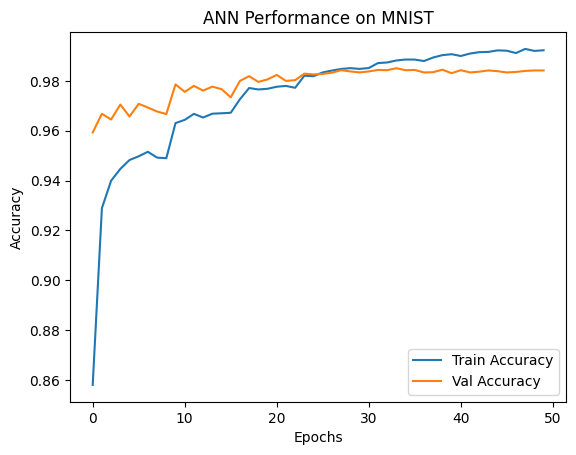

In [12]:
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ANN Performance on MNIST")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


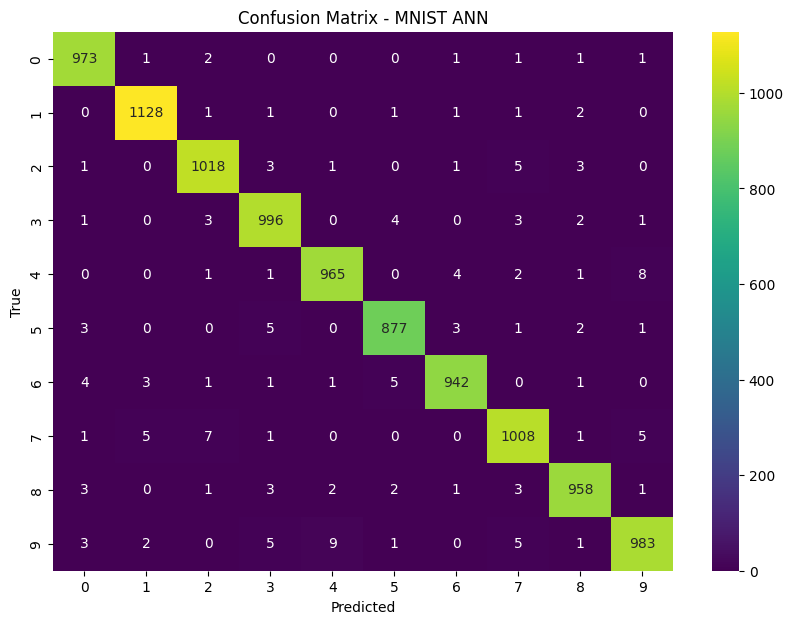

In [13]:
y_pred = model.predict(X_test)
y_pred_classes=np.argmax(y_pred, axis=1)

cm=confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MNIST ANN")
plt.show()

In [14]:
print("\nClassificatipon Report: \n")
print(classification_report(y_test, y_pred_classes))


Classificatipon Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



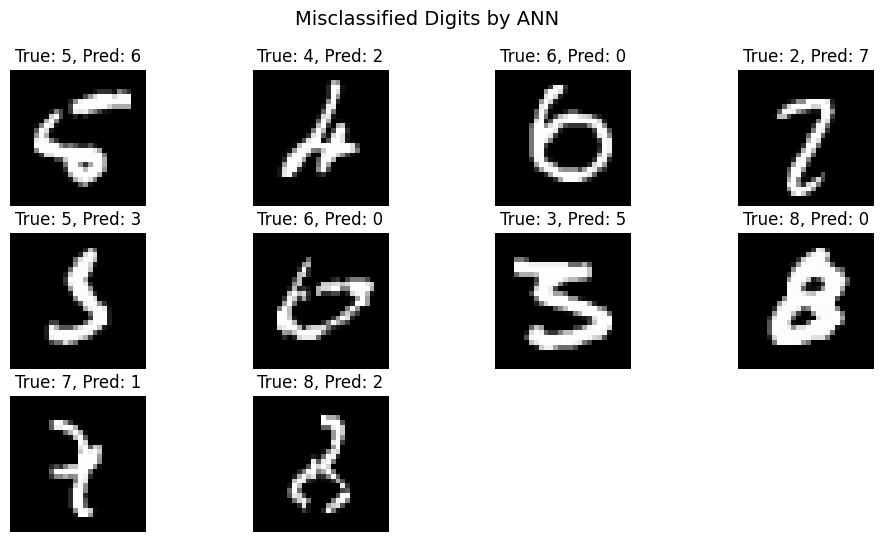

In [15]:
misclassified_idx= np.where(y_pred_classes != y_test)[0]

plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified_idx[:10]):
  plt.subplot(3,4,i+1)
  plt.imshow(X_test[idx],cmap="gray")
  plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
  plt.axis("off")
plt.suptitle("Misclassified Digits by ANN", fontsize=14)
plt.show()